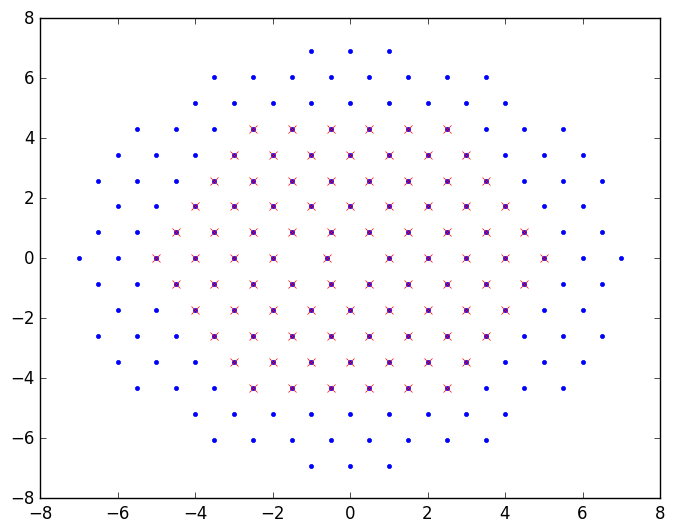

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32a1e4f90>

In [7]:
using SaddleSearch 
using SaddleSearch.TestSets
using PyPlot 

V = LJVacancy2D(R = 7.1)
x0, v0 = ic_dimer(V, :near)
E, dE = objective(V)

X = SaddleSearch.TestSets.dofs2pos(V, x0)
plot(X[1,:], X[2,:], "b.")
plot(X[1,V.Ifree], X[2,V.Ifree], "rx")

In [8]:
bbdimer = BBDimer(a0_trans=0.001, a0_rot=0.001, maxnumdE=1000, verbose=2, ls = Backtracking())
xbb, vbb, bblog = run!(bbdimer, E, dE, x0, v0)
Xbb = SaddleSearch.TestSets.dofs2pos(V, xbb)
plot(Xbb[1,:], Xbb[2,:], "b.")
plot(Xbb[1,V.Ifree], Xbb[2,V.Ifree], "rx")

 nit |  |∇E|_∞    |∇R|_∞        λ         β         γ 
-----|------------------------------------------------
   1 | 3.98e+01  9.79e+01  -8.69e+01  -1.00e+00  -1.00e+00 
   2 | 1.14e+01  1.92e+01  -5.37e+01  1.00e-03  1.00e-03 
   3 | 3.99e+00  1.11e+01  -4.19e+01  1.36e-03  8.43e-04 
   4 | 3.40e+00  3.69e+00  -3.88e+01  1.86e-03  1.65e-03 
   5 | 2.62e+00  3.80e+00  -3.42e+01  4.40e-03  1.71e-03 
   6 | 2.06e+00  5.35e+00  -3.23e+01  5.53e-03  1.12e-03 
   7 | 1.85e+00  5.71e+00  -3.33e+01  4.06e-03  3.55e-04 
   8 | 1.68e+00  6.74e+00  -3.20e+01  2.01e-03  3.24e-05 
   9 | 1.59e+00  7.05e+00  -3.20e+01  1.82e-03  9.60e-05 
  10 | 1.35e+00  5.08e+00  -3.19e+01  4.68e-03  1.20e-03 
  11 | 3.36e-01  5.28e+00  -3.09e+01  2.48e-02  3.48e-03 
  12 | 7.05e-01  1.97e+00  -3.06e+01  6.33e-03  3.09e-03 
  13 | 2.53e-01  1.55e+00  -3.13e+01  1.95e-03  3.21e-03 
  14 | 2.38e-01  8.86e-01  -3.13e+01  1.81e-03  2.55e-03 
  15 | 2.17e-01  5.61e-01  -3.13e+01  2.92e-03  2.33e-03 
  16 | 4.93e-02  1

LoadError: AssertionError: α > minα

In [1]:
using SaddleSearch
using SaddleSearch.TestSets
using SaddleSearch.TestSets: hessprecond, exp_precond, hessian

for R in (5.1,6.1,8.1,10.1)
    V = LJVacancy2D(R = R)
    x0, v0 = ic_dimer(V, :near)
    E, dE = objective(V)

    @show R
    H = hessprecond(V, x0)
    P = exp_precond(V, x0)
    eP = eigvals(full(H), full(P))
    @show maximum(eP) / minimum(eP)
    eI = eigvals(full(H))
    @show maximum(eI) / minimum(eI)
end 

R = 5.1
maximum(eP) / minimum(eP) = 69.54184299401531
maximum(eI) / minimum(eI) = 154.22260188252164
R = 6.1
maximum(eP) / minimum(eP) = 69.54184299401531
maximum(eI) / minimum(eI) = 154.22260188252164
R = 8.1
maximum(eP) / minimum(eP) = 69.54184299401531
maximum(eI) / minimum(eI) = 154.22260188252164
R = 10.1
maximum(eP) / minimum(eP) = 69.54184299401531
maximum(eI) / minimum(eI) = 154.22260188252164
